In [ ]:
import numpy as np
import lib.io.stan
import lib.plots.stan
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors,cm
from matplotlib.lines import Line2D
import random
import scipy.signal as signal

In [ ]:
res_root_dir = '/home/anirudh/hdisk/Academia/papers/VEP_infer'

# Patient CJ

In [ ]:
cj_ntwrk = np.load('datasets/id002_cj/CJ_network.npz')
cj_sim_data = np.load('datasets/id002_cj/CJ_syn_tvb_ez=6-34_pz=27-5-11.npz')

#### Structural Connectivity

In [ ]:
plt.figure(figsize=(10,10))
num_nodes = cj_ntwrk['SC'].shape[0]
log_norm = colors.LogNorm(vmin=1e-7, vmax=cj_ntwrk['SC'].max())
plt.imshow(cj_ntwrk['SC'], norm=log_norm, cmap=cm.hot)
xticks = np.append(np.array([0]),np.r_[9:num_nodes:10])
yticks = np.append(np.array([0]),np.r_[9:num_nodes:10])
plt.xticks(xticks, xticks+1, fontsize=15)
plt.yticks(yticks, yticks+1, fontsize=15)
plt.xlabel('Node',fontsize=20)
plt.ylabel('Node',fontsize=20)
cb = plt.colorbar(fraction=0.035)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(),fontsize=15);
plt.savefig(f'{res_root_dir}/figures/CJ/SC.png')


#### Gain Matrix

In [ ]:
plt.figure(figsize=(6,10))
num_sensors, num_nodes = cj_ntwrk['gain_mat'].shape
log_norm = colors.LogNorm(vmin=cj_ntwrk['gain_mat'].min(), vmax=cj_ntwrk['gain_mat'].max())
plt.imshow(cj_ntwrk['gain_mat'], norm=log_norm, cmap=cm.hot)
xticks = np.append(np.array([0]),np.r_[9:num_nodes:10])
yticks = np.append(np.array([0]),np.r_[9:num_sensors:10])
plt.xticks(xticks, xticks+1, fontsize=15)
plt.yticks(yticks, yticks+1, fontsize=15)
plt.xlabel('Node',fontsize=20)
plt.ylabel('Sensor',fontsize=20)
cb = plt.colorbar(fraction=0.045)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(),fontsize=15);
plt.savefig(f'{res_root_dir}/figures/CJ/Gain_matrix.png')

In [ ]:
print(cj_sim_data.keys())
print(cj_sim_data['src_sig'].shape)

#### Simulated Source activity

In [ ]:
import numpy as np
import lib.io.stan
import lib.plots.stan
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors,cm
from matplotlib.lines import Line2D
import random
import scipy.signal as signal

In [ ]:
# res_root_dir = '/home/anirudh/hdisk/Academia/papers/VEP_infer'
ez = cj_sim_data['ez']
pz = np.concatenate((cj_sim_data['pz_x0'], cj_sim_data['pz_kplng']))
start_idx = 2500
end_idx = 3800
src_sig = cj_sim_data['src_sig'][start_idx:end_idx,0,:,0] + cj_sim_data['src_sig'][start_idx:end_idx,3,:,0]
n_areas = src_sig.shape[1]

fig = plt.figure(figsize=(25,5))

ax = plt.subplot()
yticks = []
yticks_labels = []
for i in range(n_areas):
    if(i in ez):
        t = src_sig[:,i]+7*(np.where(ez == i)[0] + 1)
        plt.plot(t, alpha=0.5, color='xkcd:red');
        yticks.append(t.mean(axis=0))
        yticks_labels.append(f'Node {i+1}(EZ)')
    elif(i in pz):
        t = src_sig[:,i]+7*(np.where(pz == i)[0] + 3)
        plt.plot(t, alpha=0.5, color='xkcd:rust');
        yticks.append(t.mean(axis=0))
        yticks_labels.append(f'Node {i+1}(PZ)')
    else:
        plt.plot(src_sig[:,i]+5, alpha=0.5, color='black');
#         yticks.append(src_sig[:,i].mean(axis=0) +5)
plt.xlabel('Time', fontsize=20)
plt.ylabel(r'Source Activity', fontsize=20);
# plt.xticks(ax.get_xticks()[1:-1], map(lambda x: str(int(x)), ax.get_xticks()[1:-1]), fontsize=15);
# ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(yticks,yticks_labels);
# legend_elements = [Line2D([0], [0], color='xkcd:red', alpha=0.5, linewidth=4, label='EZ'),
#                    Line2D([0], [0], color='xkcd:rust', alpha=0.5, linewidth=4, label='PZ'),
#                    Line2D([0], [0], color='black', alpha=0.5, linewidth=4, label='Non-seizing'),]
# plt.legend(handles=legend_elements)
# plt.savefig(f'{res_root_dir}/figures/CJ/source_activity.png')



#### Simulated SEEG

In [ ]:
random.seed(100)
fig = plt.figure(figsize=(25,5))
ax = plt.subplot()
start_idx = 2500
end_idx = 3800
seeg_raw = cj_sim_data['seeg'][:,start_idx:end_idx]
chnl_names = []
with open('datasets/id002_cj/seeg.xyz') as fd:
    for line in fd.readlines():
        chnl_names.append(line.strip().split()[0])
rndm_chsn_chnls = random.sample(range(0,seeg.shape[0]),5)
seeg_raw = seeg_raw[rndm_chsn_chnls, :]
nyq = 1000 / 2.0
# High pass filter the data
b, a = signal.butter(5, 10.0 / nyq, 'high')
seeg_hpfilt = signal.filtfilt(b, a, seeg_raw)
t = seeg_hpfilt.T + 60*np.r_[0:len(rndm_chsn_chnls)]
yticks = t.mean(axis=0)
yticks_labels = [chnl_names[idx] for idx in rndm_chsn_chnls]
plt.plot(t, color='black');
plt.xlabel('Time', fontsize=20)
plt.ylabel('SEEG', fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(yticks, yticks_labels, fontsize=12);
plt.xticks(fontsize=12);
plt.savefig(f'{res_root_dir}/figures/CJ/seeg.png')

#### Sensors

In [ ]:
import tvbpipeline.util.plot
import numpy as np
import os
import importlib

In [ ]:
res_root_dir = 'results/tmp'
cj_sim_data = np.load('datasets/syn_data/id002_cj/CJ_syn_tvb_ez=6-34_pz=27-5-11.npz')
ez = cj_sim_data['ez']
pz = np.concatenate((cj_sim_data['pz_x0'], cj_sim_data['pz_kplng']))
tvbpipeline.util.plot.seeg_elecs('datasets/syn_data/id002_cj/connectivity.zip', 'datasets/syn_data/id002_cj/seeg.xyz', ez, pz, f'{res_root_dir}/figures/electrodes.png')

#### Onsets

In [ ]:
import numpy as np
import lib.io.stan
import lib.plots.stan
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors,cm
from matplotlib.lines import Line2D
import random
import scipy.signal as signal

In [ ]:
res_root_dir = '/home/anirudh/hdisk/Academia/papers/VEP_infer'
sim_data = np.load('datasets/syn_data/id002_cj/CJ_syn_tvb_ez=6-34_pz=27-5-11.npz')
start_idx = 2500
end_idx = 3800
sim_src_sig = sim_data['src_sig'][start_idx:end_idx,0,:,0] + sim_data['src_sig'][start_idx:end_idx,3,:,0]
ds_freq = 10
sim_src_sig_ds = sim_src_sig[0:-1:ds_freq,:]
optima = lib.io.stan.read_samples(['results/exp10/exp10.57.20/samples_syn_cj_optim_chain1.csv'])
fit_src_sig = optima['x'][0]

In [ ]:
onsets = sim_src_sig_ds.shape[0]*np.zeros(sim_src_sig_ds.shape[1])
for i, sig in enumerate(sim_src_sig_ds.T):
    sig_cond = sig > -1
    if sig_cond.any():
        onsets[i] = np.min(np.nonzero(sig_cond))

In [ ]:
plt.figure(figsize=(5,5))
# plt.bar(np.r_[1:onsets.shape[0]+1], onsets)
# plt.xticks(np.r_[1:onsets.shape[0]+1:2]);
plt.hist(onsets[np.nonzero(onsets > 0)]);

In [ ]:
onsets = np.zeros(fit_src_sig.shape[1])
for i, sig in enumerate(fit_src_sig.T):
    sig_cond = sig > 0
    if sig_cond.any():
        onsets[i] = np.min(np.nonzero(sig_cond))

# Patient BT

In [ ]:
import numpy as np
import lib.io.stan
import lib.io.tvb
import lib.io.seeg
import lib.plots.stan
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors,cm
from matplotlib.lines import Line2D
import random
import scipy.signal as signal
import os

In [ ]:
ntwrk = np.load('datasets/syn_data/id001_bt/network.npz')
sim_data = np.load('datasets/syn_data/id001_bt/syn_tvb_ez=48-79_pz=11-17-22-75.npz')
figs_dir = '/home/anirudh/hdisk/Academia/papers/VEP_infer/figures/BT'
os.makedirs(figs_dir, exist_ok=True)

#### Structural Connectivity

In [ ]:
plt.figure(figsize=(10,10))
SC = ntwrk['SC']
num_nodes = SC.shape[0]
SC[SC<1e-10] = 1e-10
log_norm = colors.LogNorm(vmin=1e-10, vmax=SC.max(), clip=True)
plt.imshow(SC, norm=log_norm, cmap=cm.hot)
xticks = np.append(np.array([0]),np.r_[9:num_nodes:10])
yticks = np.append(np.array([0]),np.r_[9:num_nodes:10])
plt.xticks(xticks, xticks+1, fontsize=15, rotation='vertical')
plt.yticks(yticks, yticks+1, fontsize=15)
plt.xlabel('Node',fontsize=20)
plt.ylabel('Node',fontsize=20)
cb = plt.colorbar(fraction=0.035)
# cb.ax.set_yticklabels(cb.ax.get_yticklabels(),fontsize=15);
plt.savefig(os.path.join(figs_dir, 'SC.png'))

#### Gain Matrix

In [ ]:
plt.figure(figsize=(10,10))
gain_mat = ntwrk['gain_mat']
num_sensors, num_nodes = gain_mat.shape
log_norm = colors.LogNorm(vmin=gain_mat.min(), vmax=gain_mat.max())
plt.imshow(gain_mat, norm=log_norm, cmap=cm.hot)
xticks = np.append(np.array([0]),np.r_[9:num_nodes:10])
yticks = np.append(np.array([0]),np.r_[9:num_sensors:10])
plt.xticks(xticks, xticks+1, fontsize=15, rotation='vertical')
plt.yticks(yticks, yticks+1, fontsize=15)
plt.xlabel('Node',fontsize=20)
plt.ylabel('Sensor',fontsize=20)
cb = plt.colorbar(fraction=0.035)
# cb.ax.set_yticklabels(cb.ax.get_yticklabels(),fontsize=15);
plt.savefig(os.path.join(figs_dir, 'Gain_matrix.png'))

#### Simulated Source activity

In [ ]:
_, roi_names = lib.io.tvb.read_roi_cntrs('datasets/syn_data/id001_bt/connectivity.destrieux.zip')
ez = sim_data['ez']
pz = sim_data['pz']
start_idx = 800
end_idx = 2300
x = sim_data['src_sig'][start_idx:end_idx,0,:,0] + sim_data['src_sig'][start_idx:end_idx,3,:,0]
z = sim_data['src_sig'][start_idx:end_idx,2,:,0]
n_areas = x.shape[1]
fig = plt.figure(figsize=(25,5))

ax = plt.subplot()
yticks = []
yticks_labels = []
for i in range(n_areas):
    if(i in ez):
        t = x[:,i]+7*(np.where(ez == i)[0] + 1)
        plt.plot(t, alpha=0.5, color='xkcd:red');
        yticks.append(t.mean(axis=0))
        yticks_labels.append(roi_names[i])
    elif(i in pz):
        t = x[:,i]+7*(np.where(pz == i)[0] + 3)
        plt.plot(t, alpha=0.5, color='xkcd:rust');
        yticks.append(t.mean(axis=0))
        yticks_labels.append(roi_names[i])
    else:
        plt.plot(x[:,i]+5, alpha=0.5, color='black');
#         yticks.append(src_sig[:,i].mean(axis=0) +5)
plt.xlabel('Time', fontsize=20)
# plt.ylabel(r'Source Activity', fontsize=20);
# plt.xticks(ax.get_xticks()[1:-1], map(lambda x: str(int(x)), ax.get_xticks()[1:-1]), fontsize=15);
# ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(yticks,yticks_labels, fontsize=15);
legend_elements = [Line2D([0], [0], color='xkcd:red', alpha=0.5, linewidth=4, label='EZ'),
                   Line2D([0], [0], color='xkcd:rust', alpha=0.5, linewidth=4, label='PZ'),
                   Line2D([0], [0], color='black', alpha=0.8, linewidth=4, label='Non-seizing'),]
plt.legend(handles=legend_elements, fontsize=15, loc='upper right')
plt.title('Simulated Data: Source Activity', fontsize=25)
plt.savefig(os.path.join(figs_dir, 'source_activity.png'))

#### Simulated SEEG

In [ ]:
random.seed(34534)#35087873
fig = plt.figure(figsize=(25,5))
ax = plt.subplot()
start_idx = 800
end_idx = 2300
seeg_raw = sim_data['seeg'][:,start_idx:end_idx]
chnl_names = []
with open('datasets/syn_data/id001_bt/seeg.xyz') as fd:
    for line in fd.readlines():
        chnl_names.append(line.strip().split()[0])
rndm_chsn_chnls = random.sample(range(0,seeg_raw.shape[0]),5)
seeg_raw = seeg_raw[rndm_chsn_chnls, :]
nyq = 1000 / 2.0
# High pass filter the data
b, a = signal.butter(5, 10.0 / nyq, 'high')
seeg_hpfilt = signal.filtfilt(b, a, seeg_raw)
t = seeg_hpfilt.T + 25*np.r_[0:len(rndm_chsn_chnls)]
yticks = t.mean(axis=0)
yticks_labels = [chnl_names[idx] for idx in rndm_chsn_chnls]
plt.plot(t, color='black');
plt.xlabel('Time', fontsize=20)
plt.ylabel('SEEG', fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(yticks, yticks_labels, fontsize=12);
plt.xticks(fontsize=12);
plt.savefig(os.path.join(figs_dir, 'seeg.png'))

#### Sensors

In [1]:
from vtkplotter import *
import numpy as np
import os
import zipfile

In [ ]:
importlib.reload(tvbpipeline.util.plot)
figs_dir = '/home/anirudh/hdisk/Academia/papers/VEP_infer/figures/BT'
sim_data = np.load('datasets/syn_data/id001_bt/syn_tvb_ez=48-79_pz=11-17-22-75.npz')
ez = sim_data['ez']
pz = sim_data['pz']
tvbpipeline.util.plot.seeg_elecs('datasets/syn_data/id001_bt/connectivity.destrieux.zip',
                                 'datasets/syn_data/id001_bt/seeg.xyz', ez, pz,
                                 os.path.join(figs_dir, 'electrodes_correct_implantation.png'))

In [2]:
sim_data = np.load('datasets/syn_data/id001_bt/syn_tvb_ez=48-79_pz=11-17-22-75.npz')
ez = sim_data['ez']
pz = sim_data['pz']

figs_dir = '/home/anirudh/Academia/papers/vep/ VEP_infer/figures/BT'

# data_dir is path to a retrospective 1-processed folder
data_dir = '/home/anirudh/Academia/projects/infer_szr_prpgtn/datasets/retro/id001_bt'

# parcellation should match fit loaded below
parc = 'destrieux'

regmap_path = f'{data_dir}/tvb/surface_cort.zip'
# need a cortices + subcortical surfaces
def surfzip2mesh(path):
    with zipfile.ZipFile(path) as zf:
        with zf.open("vertices.txt") as fd:
            vtx = np.loadtxt(fd)
        with zf.open("triangles.txt") as fd:
            tri = np.loadtxt(fd)
    return Mesh([vtx, tri])

subcort_path = f'{data_dir}/tvb/surface_subcort.zip'
cort_path = f'{data_dir}/tvb/surface_cort.zip'
regmap_path = f'{data_dir}/tvb/surface_cort.zip'

try:
    subcort_mesh = load('subcort.vtk').alpha(0.1)
    cort_mesh = load('cort.vtk').alpha(0.05).c("w")
except:
    print('rebuilding meshes')
    subcort_mesh = surfzip2mesh(subcort_path).wireframe().decimate(0.1)
    save(subcort_mesh, os.path.join(data_dir, 'tvb', 'subcort.vtk'))
    cort_mesh = surfzip2mesh(cort_path).wireframe().decimate(0.1)
    save(cort_mesh, os.path.join(data_dir, 'tvb', 'cort.vtk'))

# # load fit model from Anirudh
# fn = '/Volumes/crypt/id001_bt/vep/samples_BTcrise1appportable_0006_hpf10_lpf0.05_chain1.csv'
# csv = parse_csv(fn)
# x = csv['x'][0]
# y = (x.T - x.min(axis=1)) / x.ptp(axis=1)

# roi balls
path = f'{data_dir}/tvb/connectivity.{parc}.zip'
with zipfile.ZipFile(path) as zf:
    with zf.open('centres.txt') as fd:
        roi_xyz = np.loadtxt(fd, usecols=(1, 2, 3))
for roi_idx, pos_i in enumerate(roi_xyz):
    if roi_idx in ez:
        rois.append(Spheres(pos_i, r=1, c='r', alpha=0.2))
    elif roi_idx in pz:
        rois.append(Spheres(pos_i, r=1, c='brown', alpha=0.2))
    else:
        rois.append(Spheres(pos_i, r=1, c='black', alpha=0.2))


# seeg balls
path = f'{data_dir}/elec/seeg.xyz'
seeg_xyz = np.loadtxt(path, usecols=(1, 2, 3))
seeg = Spheres(seeg_xyz, r=2, c='y', alpha=0.2)

# top subplot
vp_anat = show([subcort_mesh, cort_mesh, seeg] + rois)

SyntaxError: invalid syntax (<ipython-input-2-4f5333ea0b6c>, line 48)

#### Phase space

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import lib.io.stan
import lib.io.tvb
import os

In [ ]:
figs_dir = '/home/anirudh/hdisk/Academia/papers/vep_infer/figures/BT'
_, roi_names = lib.io.tvb.read_roi_cntrs('datasets/syn_data/id001_bt/connectivity.destrieux.zip')
sim_data = np.load('datasets/syn_data/id001_bt/syn_tvb_ez=48-79_pz=11-17-22-75.npz')
start_idx = 800
end_idx = 2200
sim_x = sim_data['src_sig'][start_idx:end_idx,0,:,0] + sim_data['src_sig'][start_idx:end_idx,3,:,0]
sim_z = sim_data['src_sig'][start_idx:end_idx,2,:,0]
map_est = lib.io.stan.read_samples(['results/exp10/exp10.69/samples_syn_optim_chain1.csv'])
map_x = map_est['x'][0]
map_z = map_est['z'][0]
ez = sim_data['ez']
pz = sim_data['pz']
n_roi = sim_x.shape[1]
hz = np.setdiff1d(np.arange(0, n_roi), np.concatenate((ez,pz)))

In [ ]:
fig = plt.figure(figsize=(5,25))
gs = fig.add_gridspec(1, ez.shape[0])
ez_pz = np.concatenate((ez, pz))
for i, roi in enumerate(ez_pz):
    plt.subplot(ez_pz.shape[0]+1, 1, i+1)
    plt.plot(sim_x[0:-1:5, roi], sim_z[0:-1:5, roi], color='black', alpha=0.3);
    plt.plot(map_x[10:, roi], map_z[10:, roi], color='xkcd:red' if roi in ez else 'xkcd:rust')
    plt.xlabel('x', fontweight='bold', fontsize=20)
    plt.ylabel('z', fontweight='bold', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(roi_names[roi], fontsize=15)
plt.subplot(ez_pz.shape[0]+1, 1,  7)
plt.plot(sim_x[0:-1:5, hz], sim_z[0:-1:5, hz], color='black', alpha=0.3);
plt.plot(map_x[:, hz], map_z[:, hz], color='xkcd:black')
plt.xlabel('x', fontweight='bold', fontsize=20)
plt.ylabel('z', fontweight='bold', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Healthy Nodes', fontsize=15)
plt.tight_layout()
plt.savefig(os.path.join(figs_dir, 'predicted_source_crct_implnt_phasespace.svg'))

In [ ]:
fig = plt.figure(figsize=(15,25))
gs = fig.add_gridspec(7,1)
for i, roi in enumerate(np.concatenate((ez, pz))):
    fig.add_subplot(gs[i, 0])
    plt.plot(sim_x[0:-1:5, roi], 'black', alpha=0.3);
    plt.plot(map_x[:, roi], color='xkcd:red' if roi in ez else 'xkcd:rust');
    plt.ylim(-3, 1.5)
    plt.title(roi_names[roi], fontsize=15)
    
# fig.add_subplot(gs[6,0])
# plt.plot(sim_x[0:-1:5, hz], 'black', alpha=0.3);
# plt.plot(map_x[:, hz], color='xkcd:black');
# plt.title('Healthy Nodes', fontsize=15)
# plt.ylim(-3.2, 1.5)
plt.tight_layout()
plt.savefig(os.path.join(figs_dir, 'predicted_source_crct_implnt_x.svg'))

#### Onsets

In [ ]:
import numpy as np
import lib.io.stan
import lib.plots.stan
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors,cm
from matplotlib.lines import Line2D
import random
import scipy.signal as signal
import os

In [ ]:
figs_dir = '/home/anirudh/hdisk/Academia/papers/vep_infer/figures/BT'
sim_data = np.load('datasets/syn_data/id001_bt/syn_tvb_ez=48-79_pz=11-17-22-75.npz')
start_idx = 800
end_idx = 2200
sim_src_sig = sim_data['src_sig'][start_idx:end_idx,0,:,0] + sim_data['src_sig'][start_idx:end_idx,3,:,0]
ds_freq = 5
sim_src_sig_ds = sim_src_sig[0:-1:ds_freq,:]
map_est = lib.io.stan.read_samples(['results/exp10/exp10.69/samples_syn_optim_chain1.csv'])
map_src_sig = map_est['x'][0]

In [ ]:
sim_onsets = sim_src_sig_ds.shape[0]*np.zeros(sim_src_sig_ds.shape[1])
for i, sig in enumerate(sim_src_sig_ds.T):
    sig_cond = sig > 0
    if sig_cond.any():
        sim_onsets[i] = np.min(np.nonzero(sig_cond))

map_onsets = np.zeros(map_src_sig.shape[1])
for i, sig in enumerate(map_src_sig.T):
    sig_cond = sig > 0
    if sig_cond.any():
        map_onsets[i] = np.min(np.nonzero(sig_cond))

In [ ]:
plt.figure(figsize=(8,5))
# plt.bar(np.r_[1:onsets.shape[0]+1], onsets)
# plt.xticks(np.r_[1:onsets.shape[0]+1:2]);
plt.hist([sim_onsets[np.nonzero(sim_onsets > 0)],
         map_onsets[np.nonzero(map_onsets > 0)]],
         color=['black', 'xkcd:red'], alpha=0.5,
         label=['Ground Truth', 'Inferred']);
plt.xlabel('Time', fontsize=15);
plt.xticks(fontsize=15)
plt.yticks(ticks=[0,1,2], labels=[0,1,2], fontsize=15)
plt.legend(fontsize=15)
plt.savefig(os.path.join(figs_dir, 'onsets_crct_implnt.svg'))

## Fit to observation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import lib.io.stan
import lib.io.seeg
import os

In [ ]:
figs_dir = '/home/anirudh/hdisk/Academia/papers/vep_infer/figures/BT'

map_estim = lib.io.stan.read_samples(['results/exp10/exp10.69/samples_syn_optim_chain1.csv'])
slp_pred = map_estim['mu_slp'][0]
snsr_pwr_pred = map_estim['mu_snsr_pwr'][0]

obs_dat = lib.io.stan.rload('results/exp10/exp10.69/Rfiles/fit_data_snsrfit_ode_syn_optim.R')
slp_obs = obs_dat['slp']
snsr_pwr_obs = obs_dat['snsr_pwr']
nt, ns = slp_pred.shape

chnl_names = [el[0] for el in lib.io.seeg.read_contacts('datasets/syn_data/id001_bt/seeg.xyz', type='list')]

In [ ]:
np.random.seed(100)
chnls = np.random.randint(0, ns, 5)
fig = plt.figure(figsize=(22,15))
gs = fig.add_gridspec(5,4)
for i, chnl in enumerate(chnls):
    fig.add_subplot(gs[i, 0:3])
    plt.plot(slp_obs[:, chnl], color='xkcd:black', alpha=0.3)
    plt.plot(slp_pred[:, chnl], color='xkcd:red')
    if(i == 0):
        plt.title('SEEG Log. Power', fontsize=20)
    plt.ylabel(chnl_names[chnl], fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
fig.add_subplot(gs[:,3])
plt.barh(np.r_[1:ns+1], snsr_pwr_pred, color='xkcd:red', alpha=0.3)
plt.barh(np.r_[1:ns+1], snsr_pwr_obs, color='xkcd:black', alpha=0.3)
plt.title('Channel Power', fontsize=20)
plt.ylabel('Channel', fontsize=15)
plt.yticks(np.r_[1:ns+1:5], np.r_[1:ns+1:5]);
plt.savefig(os.path.join(figs_dir, 'fit_to_observations.svg'))

## Slice plots for Retrospective Engel score I

In [ ]:
import nibabel
import numpy as np
import matplotlib.pyplot as plt
import os
import lib.utils.stan
import lib.io.tvb
import matplotlib.cm

In [ ]:
root_dir = "datasets/retro/id003_mg"

t1 = nibabel.load(os.path.join(root_dir, "mri", "T1.mgz"))
t1_dat = t1.get_data()
lbl = nibabel.load(os.path.join(root_dir, "dwi", "label_in_T1.destrieux.nii.gz"))
lbl_dat = lbl.get_data()

In [ ]:
print(t1.affine)
print(lbl.affine)

#### Convert Label data FOV into T1's FOV

In [ ]:
vox2vox_trnsfrm = np.dot(np.linalg.inv(lbl.affine), t1.affine)
lbl_dat_t1fov = np.zeros_like(lbl_dat)
for c1 in range(t1_dat.shape[0]):
    for r1 in range(t1_dat.shape[1]):
        for s1 in range(t1_dat.shape[2]):
            c2,r2,s2,_ = [int(np.rint(el)) for el in np.dot(vox2vox_trnsfrm, np.array([c1,r1,s1,1]))]
            lbl_dat_t1fov[c1,r1,s1] = lbl_dat[c2-1,r2,s2-1]
np.save(os.path.join(root_dir, "dwi", "label_in_T1fov.destrieux.npy"), lbl_dat_t1fov)

In [ ]:
lbl_dat_t1fov = np.load(os.path.join(root_dir, "dwi", "label_in_T1fov.destrieux.npy"))

#### Choose colors for EZ

In [ ]:
ez_hyp = np.nonzero(np.loadtxt(os.path.join(root_dir, 'tvb', 'ez_hypothesis.destrieux.txt')))[0]
ez_pred, pz_pred = lib.utils.stan.find_ez(0, 10, ['/home/anirudh/hdisk/Academia/projects/vep.stan/results/exp10/exp10.67/id003_mg/samples_MGcrise1_hpf10_lpf0.05_chain1.csv'])
ez_pred = np.nonzero(ez_pred)[0]
pz_pred = np.nonzero(pz_pred)[0]

In [ ]:
roi_cntrs, roi_lbls = lib.io.tvb.read_roi_cntrs(os.path.join(root_dir, 'tvb', 'connectivity.destrieux.zip'))
ez_all = np.unique(np.concatenate((ez_hyp, ez_pred)))
cmap_tab10 = matplotlib.cm.get_cmap('tab10').colors
ez_clrs = dict()
for i, roi in enumerate(ez_all):
    ez_clrs[roi_lbls[roi]] = cmap_tab10[i] + (1,)

#### Groud Truth

In [ ]:
ez_col_idxs = []
for i,roi in enumerate(ez_hyp):
    ez_col_idxs.append(np.unique(np.nonzero(lbl_dat_t1fov == roi)[0]))
    print('ROI: ', roi, roi_lbls[roi], ez_clrs[roi_lbls[roi]])
    print(ez_col_idxs[i])

plt.figure()
ax = plt.axes()
for i, roi in enumerate(ez_all):
    plt.plot([0,0.5],[10-i,10-i], linewidth=15, color=ez_clrs[roi_lbls[roi]])
plt.yticks(ticks=10 - np.r_[0:len(ez_all)], labels=[roi_lbls[roi]+f'({roi})' for roi in ez_all]);
plt.xticks([])
ax.set_frame_on(False)

In [ ]:
slc_idx = [70, 80, 108, 119]
ez_slc = dict(((70, (122, 126, 161)), (80, (104,)), (108, (94,)), (119, (160,))))
# fig, axs = plt.subplots(nrows=1, ncols=len(slc_idx), figsize=(20,20), squeeze=True)
plt.figure(figsize=(15,15))
for i, slc_idx_ in enumerate(slc_idx):
    t1_slc = t1_dat[slc_idx_, :, :]
    lbl_slc = lbl_dat_t1fov[slc_idx_, :, :]
    ol = np.zeros(lbl_slc.shape + (4,))
    for roi in ez_slc[slc_idx_]:
        ol[lbl_slc == roi] = ez_clrs[roi_lbls[roi]]
    plt.subplot(2,2,i+1)
    plt.imshow(t1_slc, cmap='gray');
    plt.imshow(ol)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/retro_engel1_ezhyp_id003_mg.png')

#### Predicted EZ

In [ ]:
ez_col_idxs = []
for i,roi in enumerate(ez_pred):
    ez_col_idxs.append(np.unique(np.nonzero(lbl_dat_t1fov == roi)[0]))
    print('ROI: ', roi, roi_lbls[roi])
    print(ez_col_idxs[i])

In [ ]:
slc_idx = [70, 93, 119]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,20), squeeze=True)
for i,slc_idx_ in enumerate(slc_idx):
    t1_slc = t1_dat[slc_idx_, :, :]
    lbl_slc = lbl_dat_t1fov[slc_idx_, :, :]
    ol = np.zeros(lbl_slc.shape + (4,))
    for roi in ez_pred:
        ol[lbl_slc == roi] = ez_clrs[roi_lbls[roi]]
    axs[int(i/2),i%2].imshow(t1_slc, cmap='gray');
    axs[int(i/2),i%2].imshow(ol)
    axs[int(i/2),i%2].axis('off')
axs[-1, -1].axis('off')
plt.tight_layout()
fig.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/retro_engel1_ezpred_id003_mg.png')

In [ ]:
map_estim = lib.io.stan.read_samples(['results/exp10/exp10.67/id003_mg/samples_MGcrise1_hpf10_lpf0.05_chain1.csv'])
x = map_estim['x'][0]

ez_all = np.unique(np.concatenate((ez_hyp, ez_pred)))
szng_roi = np.unique(np.concatenate((ez_all, pz_pred)))
x_shfld = np.zeros((szng_roi.size, x.shape[0]))
ytick_lbls = []
i = 0
for roi in range(x.shape[1]):
    if(roi in szng_roi):
        x_shfld[i, :] = x[:, roi]
        ytick_lbls = ytick_lbls + [roi_lbls[roi]]
        i += 1
plt.figure(figsize=(15,6))
plt.imshow(np.exp(x_shfld), cmap='hot', aspect='auto')
plt.yticks(np.r_[0:x_shfld.shape[0]], ytick_lbls, fontsize=15)
plt.xticks(fontsize=15)
for roi in ez_all:
    roi_tick_idx = ytick_lbls.index(roi_lbls[roi])
    plt.gca().get_yticklabels()[roi_tick_idx].set_color(ez_clrs[roi_lbls[roi]])
plt.xlabel('Time', fontsize=20)
plt.ylabel('ROI', fontsize=20)

onsets = lib.utils.stan.find_onsets(x, 0)
first_onset_time = np.min(onsets)
plt.axvspan(first_onset_time, first_onset_time + 10, color='gray', alpha=0.4)
plt.text(first_onset_time, -1, r'$t_{\lambda}$', fontsize=15)
plt.text(first_onset_time + 10, -1, r'$t_{\lambda} + t_{\epsilon}$', fontsize=15)
plt.tight_layout()

plt.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/retro_engel1_src_x_id003_mg.png')

In [ ]:
map_estim = lib.io.stan.read_samples(['results/exp10/exp10.67/id003_mg/samples_MGcrise1_hpf10_lpf0.05_chain1.csv'])
x = map_estim['x'][0]
z = map_estim['z'][0]

In [ ]:
plt.figure(figsize=(20,4))
for roi in ez_all:
    plt.plot(x[:, roi], color=ez_clrs[roi_lbls[roi]], label=roi_lbls[roi])
plt.legend(fontsize=15, loc='upper right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('X', fontsize=15)
plt.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/retro_engel1_src_x_2_id003_mg.png')

### Slice plots for Engel score II

In [ ]:
import nibabel
import numpy as np
import matplotlib.pyplot as plt
import os
import lib.utils.stan
import lib.io.tvb
import matplotlib.cm

In [ ]:
root_dir = "datasets/retro/id001_bt"

t1 = nibabel.load(os.path.join(root_dir, "mri", "T1.mgz"))
t1_dat = t1.get_data()
lbl = nibabel.load(os.path.join(root_dir, "dwi", "label_in_T1.destrieux.nii.gz"))
lbl_dat = lbl.get_data()

In [ ]:
print(t1.affine)
print(lbl.affine)

#### Convert Label data FOV into T1's FOV

In [ ]:
vox2vox_trnsfrm = np.dot(np.linalg.inv(lbl.affine), t1.affine)
lbl_dat_t1fov = np.zeros_like(lbl_dat)
for c1 in range(t1_dat.shape[0]):
    for r1 in range(t1_dat.shape[1]):
        for s1 in range(t1_dat.shape[2]):
            c2,r2,s2,_ = [int(np.rint(el)) for el in np.dot(vox2vox_trnsfrm, np.array([c1,r1,s1,1]))]
            lbl_dat_t1fov[c1,r1,s1] = lbl_dat[c2-1,r2,s2-1]
np.save(os.path.join(root_dir, "dwi", "label_in_T1fov.destrieux.npy"), lbl_dat_t1fov)

In [ ]:
lbl_dat_t1fov = np.load(os.path.join(root_dir, "dwi", "label_in_T1fov.destrieux.npy"))

#### Groud Truth

In [ ]:
ez_hyp = np.nonzero(np.loadtxt(os.path.join(root_dir, 'tvb', 'ez_hypothesis.destrieux.txt')))[0]
roi_cntrs, roi_lbls = lib.io.tvb.read_roi_cntrs(os.path.join(root_dir, 'tvb', 'connectivity.destrieux.zip'))
ez_col_idxs = []
for i,roi in enumerate(ez_hyp):
    ez_col_idxs.append(np.unique(np.nonzero(lbl_dat_t1fov == roi)[0]))
    print('ROI: ', roi, roi_lbls[roi])
    print(ez_col_idxs[i])

#### Choose colors for roi in EZ hypothesis

In [ ]:
cmap_tab10 = matplotlib.cm.get_cmap('tab10').colors
ez_clrs = dict()
ez_clrs[roi_lbls[86]] = cmap_tab10[0]
ez_clrs[roi_lbls[87]] = cmap_tab10[1]

In [ ]:
slc_idx = [108]
fig, axs = plt.subplots(nrows=1, ncols=len(slc_idx), figsize=(20,20), squeeze=True)
for i,slc_idx_ in enumerate(slc_idx):
    t1_slc = t1_dat[slc_idx_, :, :]
    lbl_slc = lbl_dat_t1fov[slc_idx_, :, :]
    ol = np.zeros(lbl_slc.shape + (4,))
    for roi in ez_hyp:
        ol[lbl_slc == roi] = ez_clrs[roi_lbls[roi]] + (1,)
    axs.imshow(t1_slc, cmap='gray');
    axs.imshow(ol)
    axs.set_xticks([])
    axs.set_yticks([])
fig.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/retro_engel2_ezhyp.png')

#### Predicted EZ

In [ ]:
ez_pred, pz_pred = lib.utils.stan.find_ez(0, 10, ['results/exp10/exp10.67/id001_bt/samples_BTcrise1appportable_0006_hpf10_lpf0.02_chain1.csv'])
ez_pred = np.nonzero(ez_pred)[0]
pz_pred = np.nonzero(pz_pred)[0]
ez_col_idxs = []
print('EZ')
for i,roi in enumerate(ez_pred):
    ez_col_idxs.append(np.unique(np.nonzero(lbl_dat_t1fov == roi)[0]))
    print('ROI: ', roi, roi_lbls[roi])
    print(ez_col_idxs[i])
print('PZ')
pz_col_idxs = []
for i,roi in enumerate(pz_pred):
    pz_col_idxs.append(np.unique(np.nonzero(lbl_dat_t1fov == roi)[0]))
    print('ROI: ', roi)
    print(pz_col_idxs[i])

#### Choose colors predicted EZ

In [ ]:
ez_clrs[roi_lbls[14]] = cmap_tab10[2]
ez_clrs[roi_lbls[72]] = cmap_tab10[3]
ez_clrs[roi_lbls[142]] = cmap_tab10[4]

In [ ]:
slc_idx = [92, 108, 165, 180]
fig = plt.figure(figsize=(20,20))
# gs = fig.add_gridspec(2,2)
# fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,20), squeeze=True)
for i,slc_idx_ in enumerate(slc_idx):
    t1_slc = t1_dat[slc_idx_, :, :]
    lbl_slc = lbl_dat_t1fov[slc_idx_, :, :]
    ol = np.zeros(lbl_slc.shape + (4,))
    for roi in ez_pred:
        ol[lbl_slc == roi] = ez_clrs[roi_lbls[roi]] + (1,)
    plt.subplot(2,2,i+1)
#     axs = fig.add_subplot(gs[i, i])
    plt.imshow(t1_slc, cmap='gray');
    plt.imshow(ol)
    plt.xticks([])
    plt.yticks([])
fig.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/retro_engel2_ezpred.png')

In [ ]:
map_estim = lib.io.stan.read_samples(['results/exp10/exp10.67/id001_bt/samples_BTcrise1appportable_0006_hpf10_lpf0.02_chain1.csv'])
x = map_estim['x'][0]

ez_all = np.unique(np.concatenate((ez_hyp, ez_pred)))
x_shfld = np.zeros((ez_all.size+pz_pred.size, x.shape[0]))
ytick_lbls = []
i = 0
for roi in range(x.shape[1]):
    if((roi in ez_all) or (roi in pz_pred)):
        x_shfld[i, :] = x[:, roi]
        ytick_lbls = ytick_lbls + [roi_lbls[roi]]
        i += 1
plt.figure(figsize=(15,4))
plt.imshow(np.exp(x_shfld[0:ez_all.size+pz_pred.size]), cmap='hot', aspect='auto')
plt.yticks(np.r_[0:x_shfld.shape[0]], ytick_lbls, fontsize=15)
plt.xticks(fontsize=15)
for roi in ez_all:
    roi_tick_idx = ytick_lbls.index(roi_lbls[roi])
    plt.gca().get_yticklabels()[roi_tick_idx].set_color(ez_clrs[roi_lbls[roi]])
plt.xlabel('Time', fontsize=20)
plt.ylabel('ROI', fontsize=20)
plt.tight_layout()
plt.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/retro_engel2_src_x.png')

In [ ]:
map_estim = lib.io.stan.read_samples(['results/exp10/exp10.67/id001_bt/samples_BTcrise1appportable_0006_hpf10_lpf0.02_chain1.csv'])
x = map_estim['x'][0]

plt.figure(figsize=(20,4))
for roi in ez_pred:
    plt.plot(x[:, roi], color=ez_clrs[roi_lbls[roi]], label=roi_lbls[roi])
plt.legend(fontsize=15, loc='upper right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('X', fontsize=15)
plt.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/retro_engel2_src_x_2.png')

In [ ]:
import lib.io.stan
map_estim = lib.io.stan.read_samples(['results/exp10/exp10.67/id001_bt/samples_BTcrise1appportable_0006_hpf10_lpf0.02_chain1.csv'])
x = map_estim['x'][0].T
ez_hyp = np.nonzero(np.loadtxt('datasets/retro/id001_bt/tvb/ez_hypothesis.destrieux.txt'))[0]
plt.figure(figsize=(25,5))
for i, x_ in enumerate(x):
    if(i in ez_hyp):
        plt.plot(x_, 'r')
    else:
        plt.plot(x_, 'k')

### Slice plots for Engel score III

In [ ]:
import nibabel
import numpy as np
import matplotlib.pyplot as plt
import os
import lib.utils.stan
import matplotlib.cm
import lib.io.tvb

In [ ]:
root_dir = "datasets/retro/id028_ca"

t1 = nibabel.load(os.path.join(root_dir, "mri", "T1.mgz"))
t1_dat = t1.get_data()
lbl = nibabel.load(os.path.join(root_dir, "dwi", "label_in_T1.destrieux.nii.gz"))
lbl_dat = lbl.get_data()

In [ ]:
print(t1.affine)
print(lbl.affine)

#### Convert Label data FOV into T1's FOV

In [ ]:
vox2vox_trnsfrm = np.dot(np.linalg.inv(lbl.affine), t1.affine)
lbl_dat_t1fov = np.zeros_like(lbl_dat)
for c1 in range(t1_dat.shape[0]):
    for r1 in range(t1_dat.shape[1]):
        for s1 in range(t1_dat.shape[2]):
            c2,r2,s2,_ = [int(np.rint(el)) for el in np.dot(vox2vox_trnsfrm, np.array([c1,r1,s1,1]))]
            lbl_dat_t1fov[c1,r1,s1] = lbl_dat[c2-1,r2,s2-1]
np.save(os.path.join(root_dir, "dwi", "label_in_T1fov.destrieux.npy"), lbl_dat_t1fov)

In [ ]:
lbl_dat_t1fov = np.load(os.path.join(root_dir, "dwi", "label_in_T1fov.destrieux.npy"))

#### Groud Truth

In [ ]:
ez_hyp = np.nonzero(np.loadtxt(os.path.join(root_dir, 'tvb', 'ez_hypothesis.destrieux.txt')))[0]
roi_cntrs, roi_lbls = lib.io.tvb.read_roi_cntrs(os.path.join(root_dir, 'tvb', 'connectivity.destrieux.zip'))
ez_col_idxs = []
for i,roi in enumerate(ez_hyp):
    ez_col_idxs.append(np.unique(np.nonzero(lbl_dat_t1fov == roi)[0]))
    print('ROI: ', roi)
    print(ez_col_idxs[i])

#### Choose colors for roi in EZ hypothesis

In [ ]:
cmap_tab10 = matplotlib.cm.get_cmap('tab10').colors
ez_clrs = dict()
ez_clrs[roi_lbls[112]] = cmap_tab10[0]
ez_clrs[roi_lbls[131]] = cmap_tab10[1]
ez_clrs[roi_lbls[135]] = cmap_tab10[2]
ez_clrs[roi_lbls[151]] = cmap_tab10[3]
ez_clrs[roi_lbls[152]] = cmap_tab10[4]

In [ ]:
slc_idx = [102, 123]
fig, axs = plt.subplots(nrows=1, ncols=len(slc_idx), figsize=(20,20), squeeze=True)
for i,slc_idx_ in enumerate(slc_idx):
    t1_slc = t1_dat[slc_idx_, :, :]
    lbl_slc = lbl_dat_t1fov[slc_idx_, :, :]
    ol = np.zeros(lbl_slc.shape + (4,))
    for roi in ez_hyp:
        ol[lbl_slc == roi] = ez_clrs[roi_lbls[roi]] + (1,)
    axs[i].imshow(t1_slc, cmap='gray');
    axs[i].imshow(ol)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
fig.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/retro_engel3_ezhyp.png')

#### Predicted EZ

In [ ]:
ez_pred, pz_pred = lib.utils.stan.find_ez(0, 10, ['results/exp10/exp10.67/id028_ca/samples_CA_crise1P_091126B-BEX_0002_hpf10_lpf0.05_chain1.csv'])
ez_pred = np.nonzero(ez_pred)[0]
pz_pred = np.nonzero(pz_pred)[0]
ez_col_idxs = []
print('EZ')
for i,roi in enumerate(ez_pred):
    ez_col_idxs.append(np.unique(np.nonzero(lbl_dat_t1fov == roi)[0]))
    print('ROI: ', roi)
    print(ez_col_idxs[i])
print('PZ')
pz_col_idxs = []
for i,roi in enumerate(pz_pred):
    pz_col_idxs.append(np.unique(np.nonzero(lbl_dat_t1fov == roi)[0]))
    print('ROI: ', roi)
    print(pz_col_idxs[i])

#### Choose colors for roi in EZ Predictions

In [ ]:
ez_clrs[roi_lbls[23]] = cmap_tab10[6]

In [ ]:
slc_idx = [150]
fig, axs = plt.subplots(nrows=1, ncols=len(slc_idx), figsize=(20,20), squeeze=True)
for i,slc_idx_ in enumerate(slc_idx):
    t1_slc = t1_dat[slc_idx_, :, :]
    lbl_slc = lbl_dat_t1fov[slc_idx_, :, :]
    ol = np.zeros(lbl_slc.shape + (4,))
    for roi in ez_pred:
        ol[lbl_slc == roi] = ez_clrs[roi_lbls[roi]] + (1,)
    axs.imshow(t1_slc, cmap='gray');
    axs.imshow(ol)
    axs.set_xticks([])
    axs.set_yticks([])
fig.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/retro_engel3_ezpred.png')

In [ ]:
map_estim = lib.io.stan.read_samples(['results/exp10/exp10.67/id028_ca/samples_CA_crise1P_091126B-BEX_0002_hpf10_lpf0.05_chain1.csv'])
x = map_estim['x'][0]

ez_all = np.unique(np.concatenate((ez_hyp, ez_pred)))
pz_pred_2 = np.setdiff1d(pz_pred, ez_hyp) # removing roi's in ezhyp from pz_pred as they are already included in ez_all
x_shfld = np.zeros((ez_all.size+pz_pred_2.size, x.shape[0]))
ytick_lbls = []
i = 0
for roi in range(x.shape[1]):
    if((roi in ez_all) or (roi in pz_pred_2)):
        x_shfld[i, :] = x[:, roi]
        ytick_lbls = ytick_lbls + [roi_lbls[roi]]
        i += 1
plt.figure(figsize=(15,4))
plt.imshow(np.exp(x_shfld), cmap='hot', aspect='auto')
plt.yticks(np.r_[0:x_shfld.shape[0]], ytick_lbls, fontsize=15)
plt.xticks(fontsize=15)
for roi in ez_all:
    roi_tick_idx = ytick_lbls.index(roi_lbls[roi])
    plt.gca().get_yticklabels()[roi_tick_idx].set_color(ez_clrs[roi_lbls[roi]])
plt.xlabel('Time', fontsize=20)
plt.ylabel('ROI', fontsize=20)
plt.tight_layout()
plt.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/retro_engel3_src_x.png')

In [ ]:
import lib.io.stan
map_estim = lib.io.stan.read_samples(['results/exp10/exp10.67/id028_ca/samples_CA_crise1P_091126B-BEX_0002_hpf10_lpf0.05_chain1.csv'])
x = map_estim['x'][0].T
ez_hyp = np.nonzero(np.loadtxt('datasets/retro/id028_ca/tvb/ez_hypothesis.destrieux.txt'))[0]
plt.figure(figsize=(25,5))
for i, x_ in enumerate(x):
    if(i in ez_hyp):
        plt.plot(x_, 'r')
    else:
        plt.plot(x_, 'k')

## Confusion Matrix - Engel I

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import lib.plots.stan
import lib.utils.stan
import os
import glob
import matplotlib.pyplot as plt
import itertools

In [2]:
patient_ids = dict()
patient_ids['engel1'] = ['id003_mg','id004_bj','id010_cmn','id013_lk','id014_vc','id017_mk','id020_lma','id022_te','id025_mc','id027_sj','id030_bf','id039_mra','id050_sx']

In [3]:
roi_class_gt = []
roi_class_pred = []
for pat_id in patient_ids['engel1']:
    ez_hyp = np.loadtxt(os.path.join(f'datasets/retro/{pat_id}/tvb/ez_hypothesis.destrieux.txt'))
    roi_class_gt += list(ez_hyp)
    ez_pred, pz_pred = lib.utils.stan.find_ez(0, 10, glob.glob(f'results/exp10/retro_results/{pat_id}/*chain1.csv'))
    pred_class = ez_pred.copy()
    pred_class[pz_pred.nonzero()] = 2
    roi_class_pred += list(pred_class)

In [4]:
roi_class_gt = pd.Series(roi_class_gt, name='Hypothesis')
roi_class_pred = pd.Series(roi_class_pred, name='Prediction')
conf_mat = pd.crosstab(roi_class_gt, roi_class_pred).values
conf_mat_norm = conf_mat / conf_mat.sum(axis=1)[:, np.newaxis]

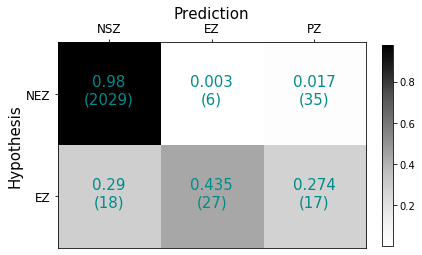

In [5]:
fig = plt.figure()
ax = fig.add_subplot()
img = ax.matshow(conf_mat_norm, cmap=plt.get_cmap('Greys'))
plt.colorbar(img, ax = ax, fraction=0.03)
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.tick_params(labelsize=12)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['NSZ', 'EZ', 'PZ'])
ax.set_yticks([0,1])
ax.set_yticklabels(['NEZ', 'EZ'])
ax.set_ylabel('Hypothesis', fontsize=15)
ax.set_xlabel('Prediction', fontsize=15)

for i in range(conf_mat_norm.shape[0]):
    for j in range(conf_mat_norm.shape[1]):
                ax.text(j, i+0.1, str(round(conf_mat_norm[i, j], 3))+f'\n({str(conf_mat[i,j])})',
                color='darkcyan', fontsize=15, horizontalalignment='center')

fig.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/conf_mat_engel1.svg')

## Confusion matrix -  Engel II

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import lib.plots.stan
import lib.utils.stan
import os
import glob
import matplotlib.pyplot as plt
import itertools

In [2]:
patient_ids = dict()
patient_ids['engel2'] = ['id001_bt','id021_jc','id040_ms']

In [3]:
roi_class_gt = []
roi_class_pred = []
for pat_id in patient_ids['engel2']:
    ez_hyp = np.loadtxt(os.path.join(f'datasets/retro/{pat_id}/tvb/ez_hypothesis.destrieux.txt'))
    roi_class_gt += list(ez_hyp)
    ez_pred, pz_pred = lib.utils.stan.find_ez(0, 10, glob.glob(f'results/exp10/retro_results/{pat_id}/*chain1.csv'))
    pred_class = ez_pred.copy()
    pred_class[pz_pred.nonzero()] = 2
    roi_class_pred += list(pred_class)

In [4]:
roi_class_gt = pd.Series(roi_class_gt, name='Hypothesis')
roi_class_pred = pd.Series(roi_class_pred, name='Prediction')
conf_mat = pd.crosstab(roi_class_gt, roi_class_pred).values
conf_mat_norm = conf_mat / conf_mat.sum(axis=1)[:, np.newaxis]

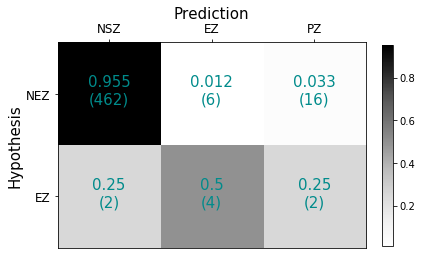

In [5]:
fig = plt.figure()
ax = fig.add_subplot()
img = ax.matshow(conf_mat_norm, cmap=plt.get_cmap('Greys'))
plt.colorbar(img, ax = ax, fraction=0.03)
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.tick_params(labelsize=12)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['NSZ', 'EZ', 'PZ'])
ax.set_yticks([0,1])
ax.set_yticklabels(['NEZ', 'EZ'])
ax.set_ylabel('Hypothesis', fontsize=15)
ax.set_xlabel('Prediction', fontsize=15)

for i in range(conf_mat_norm.shape[0]):
    for j in range(conf_mat_norm.shape[1]):
        ax.text(j, i+0.1, str(round(conf_mat_norm[i, j], 3))+f'\n({str(conf_mat[i,j])})',
                color='darkcyan', fontsize=15, horizontalalignment='center')


fig.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/conf_mat_engel2.svg')

## Confusion matrix -  Engel III/IV

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import lib.plots.stan
import lib.utils.stan
import os
import glob
import matplotlib.pyplot as plt
import itertools

In [2]:
patient_ids = dict()
patient_ids['engel3'] = ['id007_rd','id008_dmc','id023_br','id028_ca', 'id037_cg']
patient_ids['engel4'] = ['id033_fc','id036_dm']
patient_ids['engel3or4'] = patient_ids['engel3'] + patient_ids['engel4']

In [3]:
roi_class_gt = []
roi_class_pred = []
for pat_id in patient_ids['engel3or4']:
    ez_hyp = np.loadtxt(os.path.join(f'datasets/retro/{pat_id}/tvb/ez_hypothesis.destrieux.txt'))
    roi_class_gt += list(ez_hyp)
    ez_pred, pz_pred = lib.utils.stan.find_ez(0, 15, glob.glob(f'results/exp10/retro_results/{pat_id}/*chain1.csv'))
    pred_class = ez_pred.copy()
    pred_class[pz_pred.nonzero()] = 2
    roi_class_pred += list(pred_class)

In [4]:
roi_class_gt = pd.Series(roi_class_gt, name='Hypothesis')
roi_class_pred = pd.Series(roi_class_pred, name='Prediction')
conf_mat = pd.crosstab(roi_class_gt, roi_class_pred).values
conf_mat_norm = conf_mat / conf_mat.sum(axis=1)[:, np.newaxis]

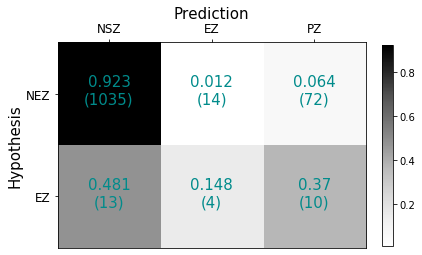

In [5]:
fig = plt.figure()
ax = fig.add_subplot()
img = ax.matshow(conf_mat_norm, cmap=plt.get_cmap('Greys'))
plt.colorbar(img, ax = ax, fraction=0.03)
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.tick_params(labelsize=12)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['NSZ', 'EZ', 'PZ'])
ax.set_yticks([0,1])
ax.set_yticklabels(['NEZ', 'EZ'])
ax.set_ylabel('Hypothesis', fontsize=15)
ax.set_xlabel('Prediction', fontsize=15)

for i in range(conf_mat_norm.shape[0]):
    for j in range(conf_mat_norm.shape[1]):
        ax.text(j, i+0.1, str(round(conf_mat_norm[i, j], 3))+f'\n({str(conf_mat[i,j])})',
                color='darkcyan', fontsize=15, horizontalalignment='center')

fig.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/conf_mat_engel3or4.svg')